In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Загрузите файл HR.csv в pandas dataframe

* satisfaction_level - Уровень удовлетворенности работой
* Last_evaluation - Время с момента последней оценки в годах
* number_projects - Количество проектов, выполненных за время работы
* average_monthly_hours - Среднее количество часов на рабочем месте в месяц
* time_spend_company - Стаж работы в компании в годах
* work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
* left - уволился ли сотрудник
* promotion_last_5years - повышался ли сотрудник за последние пять лет
* department - отдел в котором работает сотрудник
* salary - относительный уровень зарплаты

In [2]:
df = pd.read_csv('HR.csv')
df.head() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### 2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение)

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
### Определите две самые скоррелированные и две наименее скоррелированные переменные.

Text(0.5, 1.0, 'Корреляция')

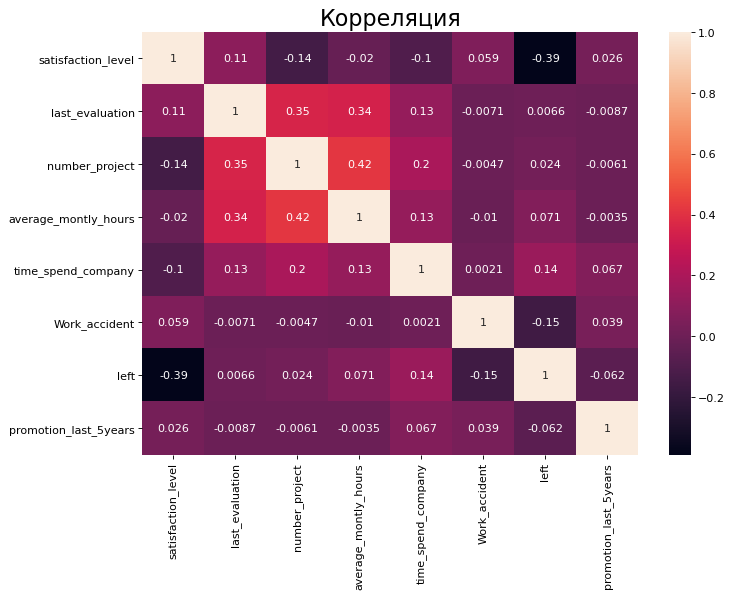

In [5]:
import seaborn as sns
#Хитмап корреляции
plt.figure(figsize=(10,7), dpi= 80)
sns.heatmap(df.corr(), annot=True)
plt.title('Корреляция', size = 20)

- Наиболее скореллированные: average_montly_hours - number_project
- Наименее скореллированные: time_spend_company - Work_accident

### 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [6]:
df.loc[df['left']==0].groupby('department').agg({'department': 'count'})

,department
department,
IT,954
RandD,666
accounting,563
hr,524
management,539
marketing,655
product_mng,704
sales,3126
support,1674


### 5. Показать распределение сотрудников по зарплатам

Text(0.5, 1.0, 'Распределение сотрудников по зарплатам')

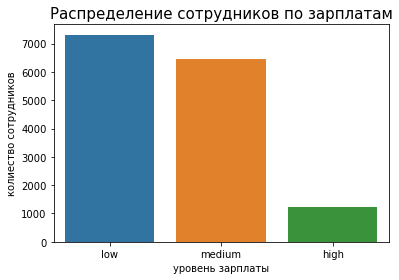

In [7]:
salary = df['salary'].value_counts().reset_index().rename(columns={0: "count"})

ax = sns.barplot(x='index', y='salary', data=salary)
ax.set(xlabel='уровень зарплаты', ylabel='колиество сотрудников')
plt.title('Распределение сотрудников по зарплатам', size = 15)

### 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

Text(0.5, 1.0, 'Распределение размера зарплат по департаментам')

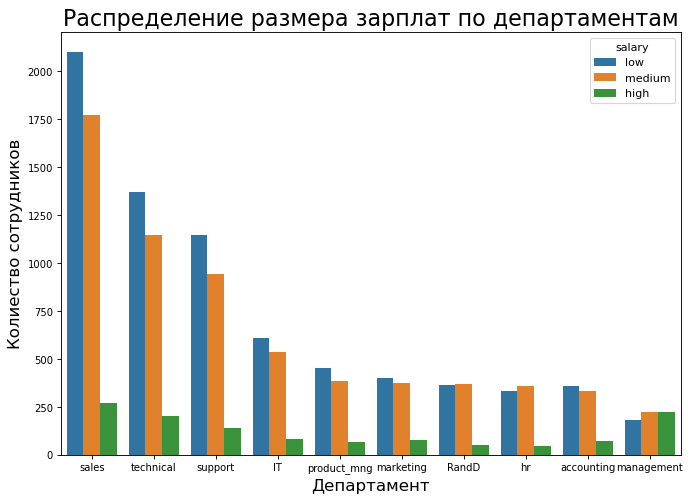

In [8]:
salary = df[['department','salary' ]]\
.groupby(['department','salary'])\
.agg({'department': 'count'})\
.rename(columns={'department': "count"})\
.reset_index()\
.sort_values(by=['count'], ascending=False)

plt.figure(figsize=(10,7), dpi= 80)
ax = sns.barplot(x="department", y='count', hue="salary", data=salary);
ax.set_xlabel("Департамент",fontsize=15)
ax.set_ylabel("Колиество сотрудников",fontsize=15)
plt.tick_params(labelsize=9)
plt.title('Распределение размера зарплат по департаментам', size = 20)
#plt.xticks(rotation=45) 

### 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

* H0: Сотрудники с высоким окладом проводят на работе меньше или столько же времени, по сравнению с сотрудниками с низким окладом.
* H1: Сотрудники с высоким окладом проводят на работе больше времени, по сравнению с сотрудниками с низким окладом.


In [9]:
from scipy import stats

In [10]:
low_salary = df['average_montly_hours'].loc[df.salary == 'low']
high_salary = df['average_montly_hours'].loc[df.salary == 'high']

In [11]:
stats.ttest_ind(high_salary, low_salary)

Ttest_indResult(statistic=-0.7288680398062308, pvalue=0.4661023478267259)

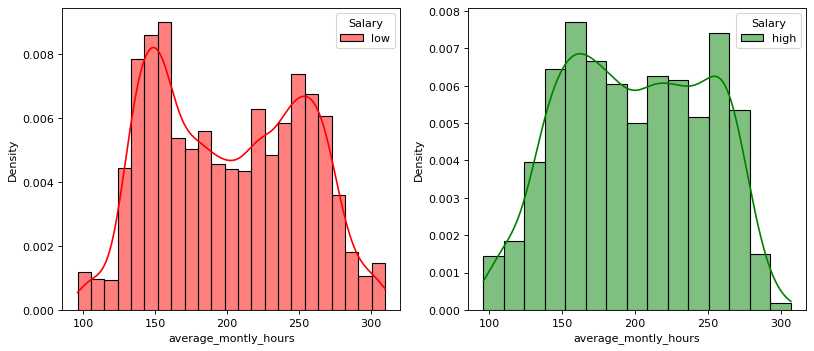

In [12]:
fig, ax =plt.subplots(1,2, figsize=(12, 5), dpi= 80)
ax0 = sns.histplot(low_salary, label='low', stat='density', color='red', kde=True, ax=ax[0])
ax0.legend(title='Salary')
ax1 = sns.histplot(high_salary, label='high', stat='density', color='green', kde=True, ax=ax[1])
ax1.legend(title='Salary')

In [13]:
stats.ttest_ind(high_salary, low_salary)

Ttest_indResult(statistic=-0.7288680398062308, pvalue=0.4661023478267259)

Результаты расчета демонстируют высокий уровень p-value, значительно выше уровня значимости 0.05.

In [14]:
stats.mannwhitneyu(high_salary, low_salary)

MannwhitneyuResult(statistic=4507096.5, pvalue=0.4120665360429347)

Подтверждаем первоначальные выводы критерием Манна-Уитни.
Высокий уровень p-value явно указывает на низкий уровень различий между распределениями. Таким образом H0-гипотезу 
отбросить не представляется возможным.

### 8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [15]:
df_8 = df.copy()

df_8.loc[df_8.left == 0,'left_type'] = 'left'
df_8.loc[df_8.left == 1,'left_type'] = 'stay'
d_cnt = {
    'left': len(df_8.loc[df_8.left == 0].index),
    'stay': len(df_8.loc[df_8.left == 1].index)
}
df_8['promotion_percent'] = df_8.apply(lambda x: (1/d_cnt[x['left_type']]) if x['promotion_last_5years'] == 1 else 0, axis=1)

df_8.groupby('left_type')\
.agg({'satisfaction_level': 'mean', 'number_project': 'mean', 'promotion_percent':'sum'})\
.rename(columns={'satisfaction_level': 'Средняя степень удовлетворенности',
               'number_project': 'Среднее количество проектов',
                'promotion_percent': 'Доля сотрудников с повышением'})



,Средняя степень удовлетворенности,Среднее количество проектов,Доля сотрудников с повышением
left_type,,,
left,0.666810,3.786664,0.026251
stay,0.440098,3.855503,0.005321


### 9. Разделить данные на тестовую и обучающую выборки
### Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
### Оценить качество модели на тестовой выборки

In [16]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['left','department', 'salary'], axis=1), df[['left']], test_size=0.25)

In [17]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
# обучаем данные
lda.fit(X_train, y_train)
# делаем прогноз на тестовой выборке
lda.predict(X_test)
# смотрим разницу факта и прогноза
result = y_test.reset_index().join(pd.DataFrame(lda.predict(X_test))) 
result.head()

C:\Users\WNick\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,index,left,0
0,2496,0,0
1,10825,0,0
2,7743,0,0
3,6005,0,0
4,9423,0,0


In [18]:
# смотрим коэффициенты дискриминатных линий
print(lda.coef_)

[[-4.60248035e+00  7.27910731e-01 -2.45993562e-01  3.72690194e-03
   2.19007142e-01 -1.05545316e+00 -1.12589883e+00]]


In [19]:
# расчитываем метрику точности
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, lda.predict(X_test))
# Так как классы не сбалансированы, давай метрика не дает достоверный ответ

0.7597333333333334

In [21]:
# расчитаем более детальные метрики:

report = classification_report(y_test, lda.predict(X_test), target_names=['stay', 'left'])
print(report)

              precision    recall  f1-score   support

        stay       0.79      0.92      0.85      2829
        left       0.52      0.26      0.34       921

    accuracy                           0.76      3750
   macro avg       0.66      0.59      0.60      3750
weighted avg       0.73      0.76      0.73      3750



#### Судя по Recall и F- мере данная модель плохо предсказывает увольнение сотрудника.